## Milestone Four: Connecting to API

In [2]:
# I will use pip to install sodapy
!pip install sodapy

In [7]:
# Next I will import some needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import chardet
from sodapy import Socrata
import csv
import re 
import string

In [14]:
# I will set pasword, username, and My App Token equal to their names so I can pull them 
# to authenticate my API for the CDC 
userame="tkobyhercsky@my365.bellevue.edu"
password="Golden5619!"
MyAppToken="wx92x1OkZAeXByMrR7LvIZnSw"

In [17]:
# next I will use Socrata to authenticate client.
client = Socrata("data.cdc.gov",
                 MyAppToken,
                 userame,
                 password)

In [27]:
# This will be returned as JSON from the API to be converted to a Python list of
# from the use of client.get to create dictionaries by sodapy.
results = client.get("rh2h-3yt2", limit=39001)

In [30]:
# Next I will use pandas to convert my data intoa dataframe
Vaccination_trends = pd.DataFrame.from_records(results)

In [31]:
Vaccination_trends

,date,mmwr_week,location,administered_daily,administered_cumulative,administered_7_day_rolling,admin_dose_1_daily,admin_dose_1_cumulative,admin_dose_1_day_rolling,date_type,administered_daily_change,administered_daily_change_1,series_complete_daily,series_complete_cumulative,series_complete_day_rolling
0,2021-11-02T00:00:00.000,44,GA,0,11482176,7327,0,6011533,1174,Admin,0,7327,0,5116933,1472
1,2021-11-02T00:00:00.000,44,WA,102215,10428348,35002,14924,5282202,5363,Report,102215,35002,11923,4846302,4741
2,2021-11-02T00:00:00.000,44,KY,5510,4933551,-44887,1199,2551688,-32623,Report,5510,-44887,928,2268640,-23971
3,2021-11-02T00:00:00.000,44,AL,0,4889817,8666,0,2624582,1893,Admin,0,8667,0,2198529,1424
4,2021-11-02T00:00:00.000,44,CT,0,5453446,11650,0,2824291,2676,Admin,0,11651,0,2524452,975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38996,2020-12-13T00:00:00.000,51,MI,0,0,0,0,0,0,Report,0,0,0,0,0
38997,2020-12-13T00:00:00.000,51,IN,475,475,475,454,454,454,Admin,475,475,32,32,32
38998,2020-12-13T00:00:00.000,51,AR,654,654,654,638,638,638,Admin,654,654,18,18,18
38999,2020-12-13T00:00:00.000,51,AL,293,293,293,292,292,292,Admin,293,293,10,10,10


## Step 1: Replace Headers

In [32]:
# First I will use list and .columns function with dataframe object to 
# pull a list of my dataframes headers. 
list(Vaccination_trends.columns)

['date',
 'mmwr_week',
 'location',
 'administered_daily',
 'administered_cumulative',
 'administered_7_day_rolling',
 'admin_dose_1_daily',
 'admin_dose_1_cumulative',
 'admin_dose_1_day_rolling',
 'date_type',
 'administered_daily_change',
 'administered_daily_change_1',
 'series_complete_daily',
 'series_complete_cumulative',
 'series_complete_day_rolling']

In [33]:
# I will use pandas .rename function to edit my headers names. As I 
# will be updating all my headers.
Vaccination_trends=Vaccination_trends.rename(columns={'date':'Date','mmwr_week':'Week', 
                                  'location':'State','administered_daily':'Doses_Administered_Daily',
                                  'administered_cumulative':'Doses_Administered_Cumulative',
                                                    'administered_7_day_rolling':'Doses_Administered_7_Day_Rolling',
                                                    'admin_dose_1_daily':'First_Dose_Admin_daily',
                                                    'admin_dose_1_cumulative':'First_Dose_Admin_Cumulative',
                                                    'admin_dose_1_day_rolling':'First_Dose_Admin_rolling',
                                                   'date_type':'Admin_or_Reported',
                                                    'administered_daily_change':'Administered_Daily_Change',
                                                    'administered_daily_change_1':'Administered_Daily_Change_Average',
                                                    'series_complete_daily':'Fully_Vaccinated_Daily',
                                                    'series_complete_cumulative':'Fully_Vaccinated_Cumulative',
                                                    'series_complete_day_rolling':'Fully_Vaccinated_Rolling'})
Vaccination_trends

,Date,Week,State,Doses_Administered_Daily,Doses_Administered_Cumulative,Doses_Administered_7_Day_Rolling,First_Dose_Admin_daily,First_Dose_Admin_Cumulative,First_Dose_Admin_rolling,Admin_or_Reported,Administered_Daily_Change,Administered_Daily_Change_Average,Fully_Vaccinated_Daily,Fully_Vaccinated_Cumulative,Fully_Vaccinated_Rolling
0,2021-11-02T00:00:00.000,44,GA,0,11482176,7327,0,6011533,1174,Admin,0,7327,0,5116933,1472
1,2021-11-02T00:00:00.000,44,WA,102215,10428348,35002,14924,5282202,5363,Report,102215,35002,11923,4846302,4741
2,2021-11-02T00:00:00.000,44,KY,5510,4933551,-44887,1199,2551688,-32623,Report,5510,-44887,928,2268640,-23971
3,2021-11-02T00:00:00.000,44,AL,0,4889817,8666,0,2624582,1893,Admin,0,8667,0,2198529,1424
4,2021-11-02T00:00:00.000,44,CT,0,5453446,11650,0,2824291,2676,Admin,0,11651,0,2524452,975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38996,2020-12-13T00:00:00.000,51,MI,0,0,0,0,0,0,Report,0,0,0,0,0
38997,2020-12-13T00:00:00.000,51,IN,475,475,475,454,454,454,Admin,475,475,32,32,32
38998,2020-12-13T00:00:00.000,51,AR,654,654,654,638,638,638,Admin,654,654,18,18,18
38999,2020-12-13T00:00:00.000,51,AL,293,293,293,292,292,292,Admin,293,293,10,10,10


As seen above all headers have been updated. I will now list each header with a description of what the data behind the headers mean.

Date - the day the data is reported on CDC COVID Data Tracker.

Week - is the week of the year that the date falls on.

State - is the State, Territory, or Federal Entity that is listed.

Doses_Administered_Daily - is the total number of administered doses by date of administration.

Doses_Administered_Cumulative - is the Cumulative total number of reported doses administered by date of administration.

Doses_Administered_7_Day_Rolling - is the 7 day average of the daily doses administered number.

First_Dose_Admin_daily - is the total number of Dose 1 administations by date of administration.

First_Dose_Admin_Cumulative - is the cumulative total of people with at least one dose of any vaccine by date of administration.

First_Dose_Admin_rolling - is the 7 day average count of people with at least one dose of any vaccine.

Admin_or_Reported - is the date of administration or date reported by CDC on COVID Tracker

Administered_Daily_Change - is the change between the number of doses administered on a given day and the previous day.

Administered_Daily_Change_Average - is the 7 day average of the daily change based on the date data are reported on CDC COVID Tracker.

Fully_Vaccinated_Daily - is the daily total count of people fully vaccinated.

Fully_Vaccinated_Cumulative - is the cumulative total of people who are fully vaccinated

Fully_Vaccinated_Rolling - is the 7 day average count of people who are fully vaccinated.

## Step 2: Format data into a more readable format

In [36]:
# Next I will create a new dataframe to edit and then add a column 
# for the month
Updated_Vaccination_trends = Vaccination_trends
Updated_Vaccination_trends['Month'] = pd.DatetimeIndex(Updated_Vaccination_trends['Date']).month
Updated_Vaccination_trends

,Date,Week,State,Doses_Administered_Daily,Doses_Administered_Cumulative,Doses_Administered_7_Day_Rolling,First_Dose_Admin_daily,First_Dose_Admin_Cumulative,First_Dose_Admin_rolling,Admin_or_Reported,Administered_Daily_Change,Administered_Daily_Change_Average,Fully_Vaccinated_Daily,Fully_Vaccinated_Cumulative,Fully_Vaccinated_Rolling,Month
0,2021-11-02T00:00:00.000,44,GA,0,11482176,7327,0,6011533,1174,Admin,0,7327,0,5116933,1472,11
1,2021-11-02T00:00:00.000,44,WA,102215,10428348,35002,14924,5282202,5363,Report,102215,35002,11923,4846302,4741,11
2,2021-11-02T00:00:00.000,44,KY,5510,4933551,-44887,1199,2551688,-32623,Report,5510,-44887,928,2268640,-23971,11
3,2021-11-02T00:00:00.000,44,AL,0,4889817,8666,0,2624582,1893,Admin,0,8667,0,2198529,1424,11
4,2021-11-02T00:00:00.000,44,CT,0,5453446,11650,0,2824291,2676,Admin,0,11651,0,2524452,975,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38996,2020-12-13T00:00:00.000,51,MI,0,0,0,0,0,0,Report,0,0,0,0,0,12
38997,2020-12-13T00:00:00.000,51,IN,475,475,475,454,454,454,Admin,475,475,32,32,32,12
38998,2020-12-13T00:00:00.000,51,AR,654,654,654,638,638,638,Admin,654,654,18,18,18,12
38999,2020-12-13T00:00:00.000,51,AL,293,293,293,292,292,292,Admin,293,293,10,10,10,12


In [38]:
# Next I will create a look up to convert month int to month name 
# in the data frame 
look_up = {'01': 'January', '02': 'February', '03': 'March', '04': 'April', '05': 'May',
            '06': 'June', '07': 'July', '08': 'August', '09': 'September', '10': 'October', '11': 'November', '12': 'December'}

In [55]:
# Next I will create a new dataframe to make sure I
# do not mess up my original data
New_Vaccination_trends = Updated_Vaccination_trends

In [56]:
# Next I will convert the month column to date and time then I will use 
# dt.month_name to get the fullmonth name in the column.
New_Vaccination_trends['Month'] = pd.to_datetime(New_Vaccination_trends['Month'], format='%m').dt.month_name()
New_Vaccination_trends

,Date,Week,State,Doses_Administered_Daily,Doses_Administered_Cumulative,Doses_Administered_7_Day_Rolling,First_Dose_Admin_daily,First_Dose_Admin_Cumulative,First_Dose_Admin_rolling,Admin_or_Reported,Administered_Daily_Change,Administered_Daily_Change_Average,Fully_Vaccinated_Daily,Fully_Vaccinated_Cumulative,Fully_Vaccinated_Rolling,Month
0,2021-11-02T00:00:00.000,44,GA,0,11482176,7327,0,6011533,1174,Admin,0,7327,0,5116933,1472,November
1,2021-11-02T00:00:00.000,44,WA,102215,10428348,35002,14924,5282202,5363,Report,102215,35002,11923,4846302,4741,November
2,2021-11-02T00:00:00.000,44,KY,5510,4933551,-44887,1199,2551688,-32623,Report,5510,-44887,928,2268640,-23971,November
3,2021-11-02T00:00:00.000,44,AL,0,4889817,8666,0,2624582,1893,Admin,0,8667,0,2198529,1424,November
4,2021-11-02T00:00:00.000,44,CT,0,5453446,11650,0,2824291,2676,Admin,0,11651,0,2524452,975,November
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38996,2020-12-13T00:00:00.000,51,MI,0,0,0,0,0,0,Report,0,0,0,0,0,December
38997,2020-12-13T00:00:00.000,51,IN,475,475,475,454,454,454,Admin,475,475,32,32,32,December
38998,2020-12-13T00:00:00.000,51,AR,654,654,654,638,638,638,Admin,654,654,18,18,18,December
38999,2020-12-13T00:00:00.000,51,AL,293,293,293,292,292,292,Admin,293,293,10,10,10,December


By creating a column with the month I will be able to match my data frame wtih data from another dataframe.

## Step 3: Identify outliers and bad data

In [58]:
# First I will use list and .columns function with dataframe object to 
# pull a list of my dataframes headers. 
list(New_Vaccination_trends.columns)

['Date',
 'Week',
 'State',
 'Doses_Administered_Daily',
 'Doses_Administered_Cumulative',
 'Doses_Administered_7_Day_Rolling',
 'First_Dose_Admin_daily',
 'First_Dose_Admin_Cumulative',
 'First_Dose_Admin_rolling',
 'Admin_or_Reported',
 'Administered_Daily_Change',
 'Administered_Daily_Change_Average',
 'Fully_Vaccinated_Daily',
 'Fully_Vaccinated_Cumulative',
 'Fully_Vaccinated_Rolling',
 'Month']

In [59]:
# First I will check and see if any of the columns conatin 
# NaNs by using the % operator
print("Does the 'Date'column contains NaN: %r " % New_Vaccination_trends.Date.isnull().values.any())
print("Does the 'Week'column contains NaN: %r " % New_Vaccination_trends.Week.isnull().values.any())
print("Does the 'State'column contains NaN: %r " % New_Vaccination_trends.State.isnull().values.any())
print("Does the 'Doses_Administered_Daily'column contains NaN: %r " % New_Vaccination_trends.Doses_Administered_Daily.isnull().values.any())
print("Does the 'Doses_Administered_Cumulative'column contains NaN: %r " % New_Vaccination_trends.Doses_Administered_Cumulative.isnull().values.any())
print("Does the 'Doses_Administered_7_Day_Rolling'column contains NaN: %r " % New_Vaccination_trends.Doses_Administered_7_Day_Rolling.isnull().values.any())
print("Does the 'First_Dose_Admin_daily'column contains NaN: %r " % New_Vaccination_trends.First_Dose_Admin_daily.isnull().values.any())
print("Does the 'First_Dose_Admin_Cumulative'column contains NaN: %r " % New_Vaccination_trends.First_Dose_Admin_Cumulative.isnull().values.any())
print("Does the 'First_Dose_Admin_rolling'column contains NaN: %r " % New_Vaccination_trends.First_Dose_Admin_rolling.isnull().values.any())
print("Does the 'Admin_or_Reported'column contains NaN: %r " % New_Vaccination_trends.Admin_or_Reported.isnull().values.any())
print("Does the 'Administered_Daily_Change'column contains NaN: %r " % New_Vaccination_trends.Administered_Daily_Change.isnull().values.any())
print("Does the 'Administered_Daily_Change_Average'column contains NaN: %r " % New_Vaccination_trends.Administered_Daily_Change_Average.isnull().values.any())
print("Does the 'Fully_Vaccinated_Daily'column contains NaN: %r " % New_Vaccination_trends.Fully_Vaccinated_Daily.isnull().values.any())
print("Does the 'Fully_Vaccinated_Cumulative'column contains NaN: %r " % New_Vaccination_trends.Fully_Vaccinated_Cumulative.isnull().values.any())
print("Does the 'Fully_Vaccinated_Rolling'column contains NaN: %r " % New_Vaccination_trends.Fully_Vaccinated_Rolling.isnull().values.any())
print("Does the 'Month'column contains NaN: %r " % New_Vaccination_trends.Month.isnull().values.any())

Does the 'Date'column contains NaN: False 
Does the 'Week'column contains NaN: False 
Does the 'State'column contains NaN: True 
Does the 'Doses_Administered_Daily'column contains NaN: False 
Does the 'Doses_Administered_Cumulative'column contains NaN: False 
Does the 'Doses_Administered_7_Day_Rolling'column contains NaN: False 
Does the 'First_Dose_Admin_daily'column contains NaN: False 
Does the 'First_Dose_Admin_Cumulative'column contains NaN: False 
Does the 'First_Dose_Admin_rolling'column contains NaN: False 
Does the 'Admin_or_Reported'column contains NaN: False 
Does the 'Administered_Daily_Change'column contains NaN: False 
Does the 'Administered_Daily_Change_Average'column contains NaN: False 
Does the 'Fully_Vaccinated_Daily'column contains NaN: False 
Does the 'Fully_Vaccinated_Cumulative'column contains NaN: False 
Does the 'Fully_Vaccinated_Rolling'column contains NaN: False 
Does the 'Month'column contains NaN: False 


As seen from the output above we can confirm that the column that contains NaNs is the State column which is not good being that is the column that states where the data is coming from.

In [60]:
# Next I will create a new dataframe to play with and remove outliers
Remove_Outlier_Vaccination = New_Vaccination_trends
Remove_Outlier_Vaccination.head()

,Date,Week,State,Doses_Administered_Daily,Doses_Administered_Cumulative,Doses_Administered_7_Day_Rolling,First_Dose_Admin_daily,First_Dose_Admin_Cumulative,First_Dose_Admin_rolling,Admin_or_Reported,Administered_Daily_Change,Administered_Daily_Change_Average,Fully_Vaccinated_Daily,Fully_Vaccinated_Cumulative,Fully_Vaccinated_Rolling,Month
0,2021-11-02T00:00:00.000,44,GA,0,11482176,7327,0,6011533,1174,Admin,0,7327,0,5116933,1472,November
1,2021-11-02T00:00:00.000,44,WA,102215,10428348,35002,14924,5282202,5363,Report,102215,35002,11923,4846302,4741,November
2,2021-11-02T00:00:00.000,44,KY,5510,4933551,-44887,1199,2551688,-32623,Report,5510,-44887,928,2268640,-23971,November
3,2021-11-02T00:00:00.000,44,AL,0,4889817,8666,0,2624582,1893,Admin,0,8667,0,2198529,1424,November
4,2021-11-02T00:00:00.000,44,CT,0,5453446,11650,0,2824291,2676,Admin,0,11651,0,2524452,975,November


In [81]:
# Next I will update the column First_Dose_Admin_rolling to be 
# numeric to run an outlier test
Updated_Remove_Outlier_Vaccination = Remove_Outlier_Vaccination
Updated_Remove_Outlier_Vaccination["First_Dose_Admin_rolling"] = pd.to_numeric(Updated_Remove_Outlier_Vaccination["First_Dose_Admin_rolling"])
Updated_Remove_Outlier_Vaccination

,Date,Week,State,Doses_Administered_Daily,Doses_Administered_Cumulative,Doses_Administered_7_Day_Rolling,First_Dose_Admin_daily,First_Dose_Admin_Cumulative,First_Dose_Admin_rolling,Admin_or_Reported,Administered_Daily_Change,Administered_Daily_Change_Average,Fully_Vaccinated_Daily,Fully_Vaccinated_Cumulative,Fully_Vaccinated_Rolling,Month
0,2021-11-02T00:00:00.000,44,GA,0,11482176,7327,0,6011533,1174,Admin,0,7327,0,5116933,1472,November
1,2021-11-02T00:00:00.000,44,WA,102215,10428348,35002,14924,5282202,5363,Report,102215,35002,11923,4846302,4741,November
2,2021-11-02T00:00:00.000,44,KY,5510,4933551,-44887,1199,2551688,-32623,Report,5510,-44887,928,2268640,-23971,November
3,2021-11-02T00:00:00.000,44,AL,0,4889817,8666,0,2624582,1893,Admin,0,8667,0,2198529,1424,November
4,2021-11-02T00:00:00.000,44,CT,0,5453446,11650,0,2824291,2676,Admin,0,11651,0,2524452,975,November
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38996,2020-12-13T00:00:00.000,51,MI,0,0,0,0,0,0,Report,0,0,0,0,0,December
38997,2020-12-13T00:00:00.000,51,IN,475,475,475,454,454,454,Admin,475,475,32,32,32,December
38998,2020-12-13T00:00:00.000,51,AR,654,654,654,638,638,638,Admin,654,654,18,18,18,December
38999,2020-12-13T00:00:00.000,51,AL,293,293,293,292,292,292,Admin,293,293,10,10,10,December


In [82]:
# Next I will use the shape function on the dataframe to get rid of 
# outliers and create a new data frame for the First_Dose_Admin_rolling column
orig_Vaccine_data = Updated_Remove_Outlier_Vaccination.shape
updated_Vaccine_data = Updated_Remove_Outlier_Vaccination[np.isfinite(Updated_Remove_Outlier_Vaccination['First_Dose_Admin_rolling'])]
new_Vaccine_data = updated_Vaccine_data.shape

In [83]:
# Now I will print the size difference for the original data and 
# new data after the outliers have been removed by using the format
# function and prev and after. 
print("The original data was: {prev[0]} rows".format(prev=orig_Vaccine_data))
print("The new data is: {after[0]} rows".format(after=new_Vaccine_data))

The original data was: 39001 rows
The new data is: 39001 rows


As seen above it states we do not have any outliers that have been removed. But I will create a box plot to check and see if any outliers can be detected and deleted.

<AxesSubplot:title={'center':'First_Dose_Admin_rolling'}, xlabel='Month'>

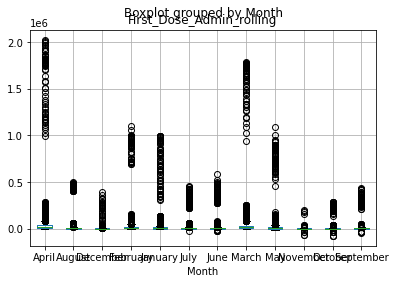

In [85]:
updated_Vaccine_data.boxplot(by ='Month', column ='First_Dose_Admin_rolling')

As seen above we see a spike in individuals receiving vaccines in April and then it pans out and spikes again in march of the following year. Being that we are seeing spikes throughout the years I will not remove any "outliers" for now.

## Step 3: Find duplicates

In [86]:
list(updated_Vaccine_data.columns)

['Date',
 'Week',
 'State',
 'Doses_Administered_Daily',
 'Doses_Administered_Cumulative',
 'Doses_Administered_7_Day_Rolling',
 'First_Dose_Admin_daily',
 'First_Dose_Admin_Cumulative',
 'First_Dose_Admin_rolling',
 'Admin_or_Reported',
 'Administered_Daily_Change',
 'Administered_Daily_Change_Average',
 'Fully_Vaccinated_Daily',
 'Fully_Vaccinated_Cumulative',
 'Fully_Vaccinated_Rolling',
 'Month']

In [87]:
# I will search and see if any of the columns have duplicate data 
# by using the format and duplicate function to state if the request is true or false
print("Is the 'Date' duplictaed: {}".format(any(updated_Vaccine_data.Date.duplicated())))
print("Is the 'Week' duplictaed: {}".format(any(updated_Vaccine_data.Week.duplicated())))
print("Is the 'State' duplictaed: {}".format(any(updated_Vaccine_data.State.duplicated())))
print("Is the 'Doses_Administered_Daily' duplictaed: {}".format(any(updated_Vaccine_data.Doses_Administered_Daily.duplicated())))
print("Is the 'Doses_Administered_Cumulative' duplictaed: {}".format(any(updated_Vaccine_data.Doses_Administered_Cumulative.duplicated())))
print("Is the 'Doses_Administered_7_Day_Rolling' duplictaed: {}".format(any(updated_Vaccine_data.Doses_Administered_7_Day_Rolling.duplicated())))
print("Is the 'First_Dose_Admin_daily' duplictaed: {}".format(any(updated_Vaccine_data.First_Dose_Admin_daily.duplicated())))

Is the 'Date' duplictaed: True
Is the 'Week' duplictaed: True
Is the 'State' duplictaed: True
Is the 'Doses_Administered_Daily' duplictaed: True
Is the 'Doses_Administered_Cumulative' duplictaed: True
Is the 'Doses_Administered_7_Day_Rolling' duplictaed: True
Is the 'First_Dose_Admin_daily' duplictaed: True


As seen above we see that each of the columns has duplicated data which is understandable for the doses columns as we have a lot of lines of data so it is bound to have repeats. As for the columns date, week, and state the reason for duplicates is due to the fact that there is data for multiple years and even states as this will cause us to have each date repeat for each state and each state is repeated for each day and year.

## Step 4: Fix casing or inconsistent values

In [88]:
# First I will use .drop to get rid of useless columns such 
# as the week as we have the exact date along with a seperate 
# column with the month.
drop_column = ['Week']
updated_Vaccine_data.drop(drop_column, inplace=True, axis=1)
updated_Vaccine_data.head()

,Date,State,Doses_Administered_Daily,Doses_Administered_Cumulative,Doses_Administered_7_Day_Rolling,First_Dose_Admin_daily,First_Dose_Admin_Cumulative,First_Dose_Admin_rolling,Admin_or_Reported,Administered_Daily_Change,Administered_Daily_Change_Average,Fully_Vaccinated_Daily,Fully_Vaccinated_Cumulative,Fully_Vaccinated_Rolling,Month
0,2021-11-02T00:00:00.000,GA,0,11482176,7327,0,6011533,1174,Admin,0,7327,0,5116933,1472,November
1,2021-11-02T00:00:00.000,WA,102215,10428348,35002,14924,5282202,5363,Report,102215,35002,11923,4846302,4741,November
2,2021-11-02T00:00:00.000,KY,5510,4933551,-44887,1199,2551688,-32623,Report,5510,-44887,928,2268640,-23971,November
3,2021-11-02T00:00:00.000,AL,0,4889817,8666,0,2624582,1893,Admin,0,8667,0,2198529,1424,November
4,2021-11-02T00:00:00.000,CT,0,5453446,11650,0,2824291,2676,Admin,0,11651,0,2524452,975,November


In [108]:
# Next I will first drop rows in the state column that are NaNs so I 
# can search and see if we have any inconsistent values.
updated_Vaccine_data.dropna(subset = ["State"], inplace=True)

In [109]:
# Next I will take a closer look at State column and 
# see if I can see any inconsistent values
States = updated_Vaccine_data['State'].unique()
States.sort()
States

array(['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL',
       'FM', 'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA',
       'MA', 'MD', 'ME', 'MH', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC',
       'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA',
       'PR', 'RI', 'RP', 'SC', 'SD', 'TN', 'TX', 'US', 'UT', 'VA', 'VI',
       'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

As seen above from what I see it does not seem like we have any inconsistencies. 

In [110]:
# Next I will create a new dataframe to pull only data for US data to 
# see if it is inconsistent
US_Data = updated_Vaccine_data[updated_Vaccine_data.State == 'US']
US_Data

,Date,State,Doses_Administered_Daily,Doses_Administered_Cumulative,Doses_Administered_7_Day_Rolling,First_Dose_Admin_daily,First_Dose_Admin_Cumulative,First_Dose_Admin_rolling,Admin_or_Reported,Administered_Daily_Change,Administered_Daily_Change_Average,Fully_Vaccinated_Daily,Fully_Vaccinated_Cumulative,Fully_Vaccinated_Rolling,Month
9,2021-11-02T00:00:00.000,US,2,423942794,727433,2,221961370,159817,Admin,2,727433,0,191329545,98666,November
46,2021-11-02T00:00:00.000,US,937410,423942794,1275824,200679,221961370,187504,Report,937410,1275824,139479,192726406,276186,November
149,2021-11-01T00:00:00.000,US,935285,423005384,1243313,240538,221760691,177353,Report,935285,1243313,133427,192586927,269591,November
230,2021-11-01T00:00:00.000,US,92315,423942792,925078,27068,221961368,203272,Admin,92315,925079,14390,191329545,124419,November
302,2021-10-31T00:00:00.000,US,201359,423850477,1109335,53888,221934300,244355,Admin,201359,1109335,33924,191315155,148955,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38743,2020-12-15T00:00:00.000,US,48550,72692,24230,46364,67484,22495,Admin,48550,24231,180,3719,1239,December
38764,2020-12-14T00:00:00.000,US,4290,24142,12071,4160,21120,10560,Adminn,4290,12071,90,3539,1769,December
38776,2020-12-14T00:00:00.000,US,509,509,255,509,509,255,Report,509,255,0,0,0,December
38940,2020-12-13T00:00:00.000,US,0,0,0,0,0,0,Report,0,0,0,0,0,December


In [111]:
# I will use value_count to see how many times each state was used
updated_Vaccine_data['State'].value_counts()

VA    650
NM    650
ND    650
US    650
AS    650
MN    650
IA    650
TN    650
AK    650
AZ    650
OK    650
NC    650
FM    650
MO    650
NY    650
NJ    650
WI    650
WA    650
LA    650
NH    650
IN    650
GU    650
PR    650
RP    650
WY    650
TX    650
RI    650
DC    650
AL    650
DE    650
PA    650
MI    650
VT    650
SC    650
OR    650
CT    650
IL    650
NV    650
UT    650
CO    650
NE    650
MD    650
OH    650
MH    650
VI    650
MP    650
HI    650
FL    650
SD    650
GA    650
MT    650
WV    650
CA    650
AR    650
MA    650
MS    650
KY    650
ID    650
ME    650
KS    650
Name: State, dtype: int64

As seen in the new US dataframe we can see that this is an actual value in the State column. Also we can see all values are correct as the use of the value count shows us that each value has 650 rows each.

In [112]:
# Next I will take a closer look at Admin_or_Reported column and 
# see if I can see any inconsistent values
report = updated_Vaccine_data['Admin_or_Reported'].unique()
report.sort()
report

array(['Admin', 'Adminn', 'Report'], dtype=object)

In [113]:
# I will use value_count to see how many times Admin_or_Reported was used
updated_Vaccine_data['Admin_or_Reported'].value_counts()

Report    19500
Admin     19499
Adminn        1
Name: Admin_or_Reported, dtype: int64

As seen above we see an inconsistent value with Admin and Adminn that showed one inconsistent value for "Adminn" that we will need to fix later with Fuzzy. 

In [114]:
# last I will take a closer look at the Month column and 
# see if I can see any inconsistent values
Month = updated_Vaccine_data['Month'].unique()
Month.sort()
Month

array(['April', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September'],
      dtype=object)

As seen above we do not see any inconsistent value so we will not need to use Fuzzy for the month column.

## Step 5: Conduct Fuzzy Matching

In [115]:
# I will now import the needed libraries for Fuzzy Matching
import fuzzywuzzy
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [116]:
# First I will look to see the top 5 closest matches 
# to "Admin" and see what we get. By using Fuzzywuzzy and the 
# .processand .extract function
match = fuzzywuzzy.process.extract("Admin", report, limit=5, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
match

[('Admin', 100), ('Adminn', 91), ('Report', 0)]

As seen above the first two items are very close to each other and we can see that it is just a typo. While the last value "report" has no match to Admin. Next I will write a function to replace items that are above 90% which would consist of typos such as the one seen with Admin.

In [117]:
# First I will create a function to allow me to replace items in columns
# from the dataframe that match above a 90% and have a limit of 5 closest
# matches to be pulled.
def match_replace (data_frame, column, string_match, min_ratio = 90):
    unique_strings = data_frame[column].unique()
    top_matches = fuzzywuzzy.process.extract(string_match, unique_strings,
                                             limit=5, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    near_matches = [top_matches[0] for top_matches in top_matches if top_matches[1]>= min_ratio]
    all_close_rows = data_frame[column].isin(near_matches)
    data_frame.loc[all_close_rows, column] = string_match
    print("Match Updated")

In [118]:
# Now I will use the function to replace the close match that is 
# above 90% for "Admin"
match_replace(data_frame=updated_Vaccine_data, column='Admin_or_Reported', string_match="Admin")

Match Updated


In [119]:
# Now I can check my work and see if I fixed the values for Admin
report = updated_Vaccine_data['Admin_or_Reported'].unique()
report.sort()
report

array(['Admin', 'Report'], dtype=object)

As seen above it looks as if we are in the clear and fuzzywuzzy did its job and replaced our "Adminn" to be "Admin"

In [120]:
updated_Vaccine_data

,Date,State,Doses_Administered_Daily,Doses_Administered_Cumulative,Doses_Administered_7_Day_Rolling,First_Dose_Admin_daily,First_Dose_Admin_Cumulative,First_Dose_Admin_rolling,Admin_or_Reported,Administered_Daily_Change,Administered_Daily_Change_Average,Fully_Vaccinated_Daily,Fully_Vaccinated_Cumulative,Fully_Vaccinated_Rolling,Month
0,2021-11-02T00:00:00.000,GA,0,11482176,7327,0,6011533,1174,Admin,0,7327,0,5116933,1472,November
1,2021-11-02T00:00:00.000,WA,102215,10428348,35002,14924,5282202,5363,Report,102215,35002,11923,4846302,4741,November
2,2021-11-02T00:00:00.000,KY,5510,4933551,-44887,1199,2551688,-32623,Report,5510,-44887,928,2268640,-23971,November
3,2021-11-02T00:00:00.000,AL,0,4889817,8666,0,2624582,1893,Admin,0,8667,0,2198529,1424,November
4,2021-11-02T00:00:00.000,CT,0,5453446,11650,0,2824291,2676,Admin,0,11651,0,2524452,975,November
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38996,2020-12-13T00:00:00.000,MI,0,0,0,0,0,0,Report,0,0,0,0,0,December
38997,2020-12-13T00:00:00.000,IN,475,475,475,454,454,454,Admin,475,475,32,32,32,December
38998,2020-12-13T00:00:00.000,AR,654,654,654,638,638,638,Admin,654,654,18,18,18,December
38999,2020-12-13T00:00:00.000,AL,293,293,293,292,292,292,Admin,293,293,10,10,10,December


## Upload DataFrame to SQLite

In [155]:
# First I will import the SQLite
import sqlite3

In [156]:
from sqlalchemy import create_engine

In [167]:
# Next I will create the connection using the imported create_engine 
# function and then invoking the connect method on it for my Vaccine dataframe.
engine = create_engine('sqlite:///Covid19_vaccine_data.db', echo=True)
sqlite_connection = engine.connect()

2021-11-10 17:39:59,724 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1


INFO:sqlalchemy.engine.base.Engine:SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1


2021-11-10 17:39:59,732 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2021-11-10 17:39:59,735 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1


INFO:sqlalchemy.engine.base.Engine:SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1


2021-11-10 17:39:59,738 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


In [168]:
sqlite_table = "Covid19_vaccine"
updated_Vaccine_data.to_sql(sqlite_table, sqlite_connection, if_exists='fail')

2021-11-10 17:40:00,746 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("Covid19_vaccine")


INFO:sqlalchemy.engine.base.Engine:PRAGMA main.table_info("Covid19_vaccine")


2021-11-10 17:40:00,748 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


ValueError: Table 'Covid19_vaccine' already exists.

In [169]:
# Next we will take a look at the data through the sqlite3 command 
# line viewer to make sure it was properly saved to the SQLite file
sqlite3

<module 'sqlite3' from '/Users/Robyn/opt/anaconda3/lib/python3.8/sqlite3/__init__.py'>

In [170]:
# Next I will open my data frame back up from sql lite
# Read sqlite query results into a pandas DataFrame
Vaccine_df = pd.read_sql_query("select * from Covid19_vaccine", sqlite_connection)

# Verify that result of SQL query is stored in the dataframe
print(df.head())

2021-11-10 17:40:02,276 INFO sqlalchemy.engine.base.Engine select * from Covid19_vaccine


INFO:sqlalchemy.engine.base.Engine:select * from Covid19_vaccine


2021-11-10 17:40:02,285 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


                      Date Week State Doses_Administered_Daily  \
0  2021-11-02T00:00:00.000   44    GA                        0   
1  2021-11-02T00:00:00.000   44    WA                   102215   
2  2021-11-02T00:00:00.000   44    KY                     5510   
3  2021-11-02T00:00:00.000   44    AL                        0   
4  2021-11-02T00:00:00.000   44    CT                        0   

  Doses_Administered_Cumulative Doses_Administered_7_Day_Rolling  \
0                      11482176                             7327   
1                      10428348                            35002   
2                       4933551                           -44887   
3                       4889817                             8666   
4                       5453446                            11650   

  First_Dose_Admin_daily First_Dose_Admin_Cumulative First_Dose_Admin_rolling  \
0                      0                     6011533                     1174   
1                  14924        

In [171]:
# Next I will close the database connection.
sqlite_connection.close()